## Configure MaskRCNN

In [1]:
!python setup.py install
!pip show mask-rcnn


running install
running bdist_egg
running egg_info
writing mask_rcnn.egg-info/PKG-INFO
writing dependency_links to mask_rcnn.egg-info/dependency_links.txt
writing top-level names to mask_rcnn.egg-info/top_level.txt
reading manifest file 'mask_rcnn.egg-info/SOURCES.txt'
reading manifest template 'MANIFEST.in'
writing manifest file 'mask_rcnn.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/mrcnn
copying build/lib/mrcnn/__init__.py -> build/bdist.linux-x86_64/egg/mrcnn
copying build/lib/mrcnn/config.py -> build/bdist.linux-x86_64/egg/mrcnn
copying build/lib/mrcnn/utils.py -> build/bdist.linux-x86_64/egg/mrcnn
copying build/lib/mrcnn/parallel_model.py -> build/bdist.linux-x86_64/egg/mrcnn
copying build/lib/mrcnn/visualize.py -> build/bdist.linux-x86_64/egg/mrcnn
copying build/lib/mrcnn/model.py -> build/bdist.linux-x86_64/egg/mrcnn
byte-compiling bu

## Download PreTrained Model on coco

In [2]:
#!wget https://github.com/matterport/Mask_RCNN/releases/download/v2.0/mask_rcnn_coco.h5


## Inspect DataSet

sssssssssssssssssssssssssssssssssss

Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                22
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE   

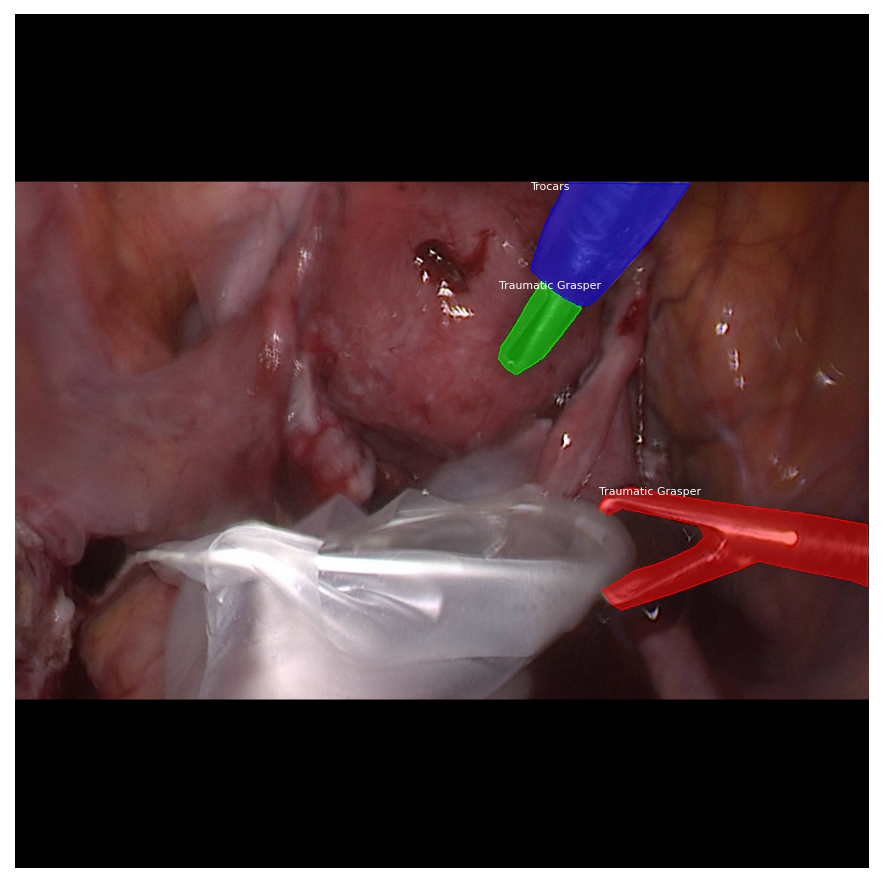

In [3]:
import sys
import os 
#Root directory of the project
ROOT_DIR = '/home/mahmoud/Desktop/Mask_RCNN'  

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library

from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log
# Import Tool config
ss = sys.path.append(os.path.join(ROOT_DIR, "samples/Tool"))  # To find local version

# import for binary classification (cylindrical and Non)
import SurgAr_Tool_Load

# import for geometric classes only (tip, edge lines, mid line)
import SurgAr_Tool_Load_Only_Geometry_Classes

# import for all classes 
import surgAR_Load_Tool_All


import numpy as np

# Training dataset.
dataset_train = surgAR_Load_Tool_All.CustomDataset()

# dataset surgar
dataset_train.load_custom('/home/mahmoud/Desktop/Mask_RCNN/samples/Tool/dataset', "train")

# prepare dataset 
dataset_train.prepare()
#print(dataset_train.num_images)

# model configuration 
config = surgAR_Load_Tool_All.CustomConfig()

#display configuration 
config.display()

# Override the training configurations with a few
# changes for inferencing.
class InferenceConfig(config.__class__):
    # Run detection on one image at a time
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    DETECTION_MIN_CONFIDENCE = 0.9

image_id = 20#50 #47 #20
#config = InferenceConfig()
#config.display()

# Load and display
image, image_meta, class_ids, bbox, mask = modellib.load_image_gt(
        dataset_train, config, image_id, use_mini_mask=False)

#print(mask.shape, bbox.shape, class_ids)
#print(dataset_train.image_info[image_id])

# visulaize image 
visualize.display_instances(image, bbox, mask, class_ids, dataset_train.class_names,
                            show_bbox=False, show_mask= True)


## Show Masks

[0 1 2 3 4 5 6 7 8 9]
6


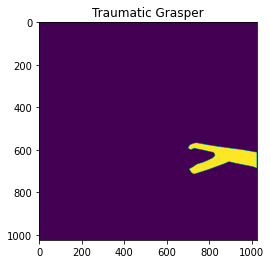

6


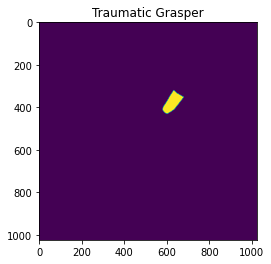

4


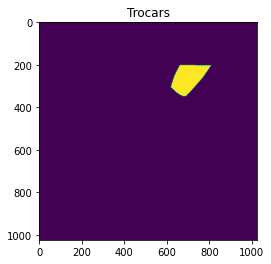

In [4]:
import matplotlib.pyplot as plt
import cv2 
%matplotlib inline
# load image 
image = dataset_train.load_image(image_id)
# image info
info = dataset_train.image_info[image_id]
print(np.unique(dataset_train.class_ids))
# Compute Bounding box
bbox = utils.extract_bboxes(mask)

for i in range(len(class_ids)):
  print(class_ids[i])
  plt.title(dataset_train.class_names[class_ids[i]])
  #cv2.imwrite('tippoint.png',mask[:,:,0]*255)
  plt.imshow(mask[:,:,i])
  plt.show()

#visualize.display_instances(image, bbox, mask, class_ids, dataset_train.class_names)

## Train 

In [ ]:

!python /home/mahmoud/Desktop/Mask_RCNN/samples/Tool/surgAR_Load_Tool_All.py train --dataset=/home/mahmoud/Desktop/Mask_RCNN/samples/Tool/dataset/ --weights=coco --logs=/home/mahmoud/Desktop/Mask_RCNN/logs


2021-04-28 06:16:11.626921: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
sssssssssssssssssssssssssssssssssss
2021-04-28 06:16:12.937390: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-04-28 06:16:12.937842: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-04-28 06:16:12.962520: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-04-28 06:16:12.962849: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: GeForce RTX 3080 computeCapability: 8.6
coreClock: 1.8GHz coreCount: 68 deviceMemorySize: 9.78GiB deviceMemoryBandwidth: 707.88GiB/s
2021-04-28 06:16:12.962862: I tensorflow/

2021-04-28 06:16:17.338157: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:196] None of the MLIR optimization passes are enabled (registered 0 passes)
2021-04-28 06:16:17.418619: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3699850000 Hz
Training network heads

Starting at epoch 0. LR=0.001

Checkpoint Path: /home/mahmoud/Desktop/Mask_RCNN/logs/object20210428T0616/mask_rcnn_object_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
rpn_model              (Functional)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistribut

2021-04-28 06:17:33.727033: I tensorflow/stream_executor/cuda/cuda_driver.cc:789] failed to allocate 3.06G (3288045824 bytes) from device: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2021-04-28 06:17:33.727517: I tensorflow/stream_executor/cuda/cuda_driver.cc:789] failed to allocate 2.76G (2959241216 bytes) from device: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2021-04-28 06:17:33.727536: W tensorflow/core/common_runtime/bfc_allocator.cc:248] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.71GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2021-04-28 06:17:33.728037: I tensorflow/stream_executor/cuda/cuda_driver.cc:789] failed to allocate 3.06G (3288045824 bytes) from device: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2021-04-28 06:17:33.728048: W tensorflow/core/common_runtime/bfc_allocator.cc:248] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.71GiB with free

100/100 [==============================] - ETA: 0s - batch: 49.5000 - size: 1.0000 - loss: 2.4293 - rpn_class_loss: 0.0294 - rpn_bbox_loss: 0.5651 - mrcnn_class_loss: 0.4689 - mrcnn_bbox_loss: 0.7937 - mrcnn_mask_loss: 0.5722  ETA: 10s - batch: 18.5000 - size: 1.0000 - loss: 3.1134 - rpn_class_loss: 0.0402 - rpn_bbox_loss: 0.6948 - mrcnn_class_loss: 0. - ETA: 1s - batch: 45.5000 - size: 1.0000 - loss: 2.4853 - rpn_class_loss: 0.0302 - rpn_bbox_loss: 0.5756 - mrcnn_class_loss: 0.4749 - mrcnn_bbox_loss: 0.8127 - mrcnn_mask_loss/home/mahmoud/anaconda3/envs/torchgpu/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '
100/100 [==============================] - 147s 341ms/step - batch: 49.5000 - size: 1.0000 - loss: 2.4293 - rpn_

## LOSS Performance Tensorboard

In [ ]:
import tensorboard
tensorboard.__version__
#!tensorboard --logdir /content/Mask_RCNN/logs/ --host localhost
%load_ext tensorboard
%tensorboard --logdir /home/mahmoud/Desktop/Mask_RCNN/logs/object20210427T0217

## ...........................................TEST...................................................... 

## Import important packages 

In [ ]:
import os
import sys
import random
import math
import re
import time
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Root directory of the project
ROOT_DIR = '/home/mahmoud/Desktop/Mask_RCNN'  

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log
# Import Tool config
ss = sys.path.append(os.path.join(ROOT_DIR, "samples/Tool"))  # To find local version
import SurgAr_Tool_Load
import visualize_custom

## load model configurarion for inference 

In [ ]:
config = SurgAr_Tool_Load.CustomConfig()
# Override the training configurations with a few
# changes for inferencing.
class InferenceConfig(config.__class__):
    # Run detection on one image at a time
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    DETECTION_MIN_CONFIDENCE = 0.90

config = InferenceConfig()
config.display()

## Load Test or Val Data 

In [ ]:
# Load validation dataset
TOOL_DATA_DIR = '/home/mahmoud/Desktop/Mask_RCNN/samples/Tool/dataset'
dataset = SurgAr_Tool_Load.CustomDataset()
dataset.load_custom(TOOL_DATA_DIR, "val")

# Must call before using the dataset
dataset.prepare()

print("Images: {}\nClasses: {}".format(len(dataset.image_ids), dataset.class_names))

## Load MaskRCNN Model For Testing 

In [ ]:
# Create model object in inference mode.
model = modellib.MaskRCNN(mode="inference",model_dir='/content/Mask_RCNN/logs', config=config)

trainedModelPath = '/home/mahmoud/Desktop/Mask_RCNN/samples/Tool/Evaluation/NoAugmentation/PreTrained/merged_classes/model/mask_rcnn_object_0100.h5'
# Load weights trained on MS-COCO
model.load_weights(trainedModelPath, by_name=True)

## Predict random image

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 
import random

def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

# choose random image from the validation set 
image_id = random.choice(dataset.image_ids)

# load image and its ground truths 
image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset, config, image_id, use_mini_mask=True)

# image info 
info = dataset.image_info[image_id]
print("image ID: {}.{} ({}) {}".format(info["source"], info["id"], image_id, 
                                       dataset.image_reference(image_id)))

# Load and display original image with masks, bbox GT overlay on the image 
image, image_meta, class_ids, bbox, mask = modellib.load_image_gt(
        dataset, config, image_id, use_mini_mask=False)
visualize.display_instances(image, bbox, mask, class_ids, dataset.class_names)


# detect the image
results = model.detect([image], verbose=1)

# Display results
ax = get_ax(1)
r = results[0]
# show image with results 
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            dataset.class_names, r['scores'], ax=ax,
                            title="Predictions", show_mask=True)
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)

## Predict image by image

In [ ]:
# image path 
path = '/home/mahmoud/Desktop/Mask_RCNN/samples/Tool/dataset/val/img/pauline 1.png'
#path = '/home/mahmoud/Desktop/laparoscopic-Tools-Segmentation/Data/Segmentation_Rigid_Training/Training/OP1/Raw/img_30_raw.png'
# read image 
imgIndv = cv2.imread(path)
#imgIndv = cv2.resize(imgIndv, (1024, 1024))

# detect image using maskrcnn trained model 
resultIndv = model.detect([imgIndv], verbose=1)
ax2 = get_ax(1)
r2 = resultIndv[0]

visualize.display_instances(imgIndv, r2['rois'], r2['masks'], r2['class_ids'], 
                            dataset.class_names, r2['scores'], ax=ax2,
                            title="Predictions", show_mask=True)
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)

## Load ART-Net

In [ ]:
from tensorflow.keras.models import model_from_yaml

#-----------------------------------Create ART-Net Model----------------------------------------------------

# Load (Read) the model which saved as yaml file. 
yaml_file = open('/home/mahmoud/Desktop/laparoscopic-Tools-Segmentation/Jupyter/modelSaved.yaml', 'r')  
# "modelSaved.yaml" is the file name and should be in the same directory of this notebook script. 

loaded_model_yaml = yaml_file.read()
yaml_file.close()
modelArt = model_from_yaml(loaded_model_yaml)
# model.summary() #If you want to see the model summary then uncomment this. Uncomment is preferable. 


#------------------------Load the traiend Weight to the ART-Net Model---------------------------------------
modelArt.load_weights("/home/mahmoud/Desktop/laparoscopic-Tools-Segmentation/Models/FullTraining/ModelLR1/fullmodel.h5")
# "FineTunedmodel.hdf5" is the saved weights and should be in the same directory of this notebook script. 


## Crop Bounding Boxes then apply ART-Net

In [ ]:

# Number of instances
boxes = r2['rois']
N = boxes.shape[0]
imageArt = np.zeros((imgIndv.shape[0],imgIndv.shape[1],3),dtype=np.uint8)

if not N:
    print('No instances found')
else:    
    for i in range(N):
        class_id = r2['class_ids'][i]
        label = dataset.class_names[class_id]
        if label == 'Cylindrical':
            y1, x1, y2, x2  = boxes[i]
            crop = imgIndv[y1:y2, x1:x2] 
            imageArt[y1:y2, x1:x2] = crop 
            imageArt = cv2.resize(imageArt, (256, 192))
            img=imageArt/imageArt.max()
            img=np.expand_dims(img, axis=0)
            Prediction =modelArt.predict(img,verbose=1)
            mask=(255*(Prediction[2].reshape(192,256))).astype(np.uint8)
            plt.imshow(imageArt)
            plt.show()
            plt.imshow(mask)
            plt.show()         
        imageArt = np.zeros((imgIndv.shape[0],imgIndv.shape[1],3),dtype=np.uint8)        
# resize to Art-net input size
w = 192
h = 256
imageArt = np.zeros((w,h,3),
                        dtype=np.uint8)
#print(r['masks'][:,:,0].dtype)
# read image from surgar dataset



## Crop Bounding Boxes then apply ART-Net. Another method 

In [ ]:
# midline : 1 , edgelines : 3, tip point : 2 

pathEmpty = '/home/mahmoud/Desktop/laparoscopic-Tools-Segmentation/DataFinal/Train/Train_Negative/Train_Neg_sample_0002.png'
imgEmpty = cv2.imread(pathEmpty)
# Number of instances
boxes = r2['rois']
N = boxes.shape[0]
image_copy = imgIndv.copy()
imageArt = np.zeros((imgIndv.shape[0],imgIndv.shape[1],3),dtype=np.uint8)
if not N:
    print('No instances found')
else:    
    for i in range(N-1):
        class_id = r2['class_ids'][i]
        label = dataset.class_names[class_id]
        if label == 'Cylindrical':
            y1, x1, y2, x2  = boxes[i]
            for j in range(N):
                y1, x1, y2, x2  = boxes[j]
                result = np.array_equal(np.array(boxes[i]), np.array( boxes[j]))
                if not result:
                    image_copy[y1:y2, x1:x2] = imgEmpty[y1:y2, x1:x2]
                    print(image_copy[y1:y2, x1:x2].shape, imgEmpty[y1:y2, x1:x2].shape)
            image_copy = cv2.resize(image_copy, (256, 192))
            img=image_copy/image_copy.max()
            img=np.expand_dims(img, axis=0)
            Prediction =modelArt.predict(img,verbose=1)
            mask=(255*(Prediction[2].reshape(192,256))).astype(np.uint8)   
            plt.imshow(image_copy)
            plt.show()
            plt.imshow(mask)
            plt.show()
            #edgeLinesM()
            #midLineM()
            tipPointM()
            image_copy = imgIndv.copy() 
            
  



## Segmentation map to geometric primitives 

In [ ]:
from skimage.transform import hough_line, hough_line_peaks, probabilistic_hough_line


#...........................Edge lines.............................................................
def edgeLinesM():
    imgPred = mask.copy() 
    imgPredtemp=imgPred.copy()
    orimg = imgIndv.copy()
    orimg = cv2.resize(orimg,(256,192))
    midlinesavePath = '/home/mahmoud/Desktop/Mask_RCNN/samples/Tool/TestFull/results/merged_cyl_nocylind_noAug/image1/primitives'


    #-----------------------Truncate the intensity lower than Threshold--------------------------
    Threshold = (imgPred.max())-100
    imgPred[imgPred<Threshold]=0
    imgPredtemp[imgPredtemp<Threshold-30]=0

    #-----------------------Classic straight-line Hough transform-------------------------------
    h, theta, d = hough_line(imgPred)        
    for _, angle, dist in zip(*hough_line_peaks(h, theta, d,min_distance=9, min_angle=10, threshold=0.5*h.max(), num_peaks=1)):
        y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
        y1 = (dist - imgPred.shape[1] * np.cos(angle)) / np.sin(angle)
    x0P1 = 0
    y0P1 = int(y0)
    x1P1 = imgPred.shape[1]
    y1P1 = int(y1)

    #-------------------------Approximate Line_1------------------------------------------------
    ApproximateLine1=np.zeros_like(imgPred, dtype=np.uint8)

    cv2.line(ApproximateLine1,(x0P1,y0P1),(x1P1,y1P1), 255, 1)       

    #------------------------Classic straight-line Hough transform------------------------------
    temp=np.zeros_like(imgPred, dtype=np.uint8)
    temp=cv2.line(temp,(x0P1,y0P1),(x1P1,y1P1), 255, 15)

    temp = 255-temp

    imgPred=imgPred & temp

    h, theta, d = hough_line(imgPred)        
    for _, angle, dist in zip(*hough_line_peaks(h, theta, d,min_distance=9, min_angle=10, threshold=0.5*h.max(), num_peaks=1)):
        y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
        y1 = (dist - imgPred.shape[1] * np.cos(angle)) / np.sin(angle)
    x0P2 = 0
    y0P2 = int(y0)
    x1P2 = imgPred.shape[1]
    y1P2 = int(y1)

    #-------------------------Approximate Line_2------------------------------------------------
    ApproximateLine2=np.zeros_like(imgPred, dtype=np.uint8)

    cv2.line(ApproximateLine2,(x0P2,y0P2),(x1P2,y1P2), 255, 1)

    ApproximateLine = ApproximateLine2 + ApproximateLine1

    cv2.imwrite(midlinesavePath+'/image'+'_Line_1_.png',ApproximateLine1) 
    cv2.imwrite(midlinesavePath+'/image2'+'_Line_2_.png',ApproximateLine2) 



    #-------------------Overlay with original Image and same to path-------------------------------       
    temp = cv2.merge((ApproximateLine, ApproximateLine, ApproximateLine))
    temp [:,:,0]=0
    temp [:,:,2]=0  
    dummy1 = cv2.addWeighted(temp,0.99,orimg,0.8,0)
    cv2.imwrite(midlinesavePath+'/image_overlay'+'_Lines.png',dummy1) 
    plt.imshow(dummy1)
    plt.show()
    

def tipPointM():
    imgPred = mask.copy() 
    imgPredtemp=imgPred.copy()
    orimg = imgIndv.copy()
    orimg = cv2.resize(orimg,(256,192))
    midlinesavePath = '/home/mahmoud/Desktop/Mask_RCNN/samples/Tool/TestFull/results/merged_cyl_nocylind_noAug/image1/primitives'
    #......................................... Tool Tip .....................................................

    #----------------------Truncate the intensity lower than Threshold-----------------------
    Threshold = (imgPred.max())-100
    imgPred[imgPred<Threshold]=0

    #-----------------------Overlay with original Image--------------------------------------       
    temp = cv2.merge((imgPred, imgPred, imgPred))
    temp [:,:,0]=0
    temp [:,:,2]=0   
    dummy = cv2.addWeighted(temp, 0.8, orimg, 0.8, 0)        
    cv2.imwrite(midlinesavePath+'/image_overlay'+'_tip.png',dummy) 
   
    




def midLineM():
    
    imgPred = mask.copy() 
    imgPredtemp=imgPred.copy()
    orimg = imgIndv.copy()
    orimg = cv2.resize(orimg,(256,192))
    midlinesavePath = '/home/mahmoud/Desktop/Mask_RCNN/samples/Tool/TestFull/results/merged_cyl_nocylind_noAug/image1/primitives'

    #-------------------------------Truncate the intensity lower than Threshold----------------------
    Threshold = (imgPred.max())-100
    imgPred[imgPred<Threshold]=0

    temp = cv2.merge((imgPredtemp, imgPredtemp, imgPredtemp))
    temp [:,:,0]=0
    temp [:,:,2]=0 


    savelinePath=midlinesavePath+'ImgID_'+'mid'+'_Prediction_.png'
    cv2.imwrite(savelinePath,cv2.addWeighted(temp,0.99,orimg,0.8,0))


    #-----------------------------Classic straight-line Hough transform----------------------------
    h, theta, d = hough_line(imgPred)        
    for _, angle, dist in zip(*hough_line_peaks(h, theta, d, min_distance=9, min_angle=10, threshold=0.5*h.max(), num_peaks=1)):
        y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
        y1 = (dist - imgPred.shape[1] * np.cos(angle)) / np.sin(angle)
    x0P = 0
    y0P = int(y0)
    x1P = imgPred.shape[1]
    y1P = int(y1)
    #-----------------------------Approximate Line-------------------------------------------------
    ApproximateLine=np.zeros_like(imgPred, dtype=np.uint8)

    cv2.line(ApproximateLine,(x0P,y0P),(x1P,y1P), 255, 1)

    #-----------------------Overlay with original Image------------------------------------------       
    temp = cv2.merge((ApproximateLine, ApproximateLine, ApproximateLine))
    temp [:,:,0]=0
    temp [:,:,2]=0 

    mid = cv2.addWeighted(temp,0.99,orimg,0.8,0)
    cv2.imwrite(midlinesavePath+'/image_overlay'+'_midLine.png',mid) 
    plt.imshow(mid)
    plt.show()
    





In [ ]:
#imgpath = '/home/mahmoud/Desktop/laparoscopic-Tools-Segmentation/DataFinal/Test/Test_Positive/Test_Pos_sample_0002.png'
#imgpath = '/home/mahmoud/Desktop/Mask_RCNN/samples/Tool/dataset/val/img/Immagine 2021-02-05 094421.png'
#imgpath = '/home/mahmoud/Desktop/Mask_RCNN/samples/Tool/dataset/val/img/Immagine 2021-02-05 094654.png'
imgpath = '/home/mahmoud/Desktop/laparoscopic-Tools-Segmentation/DataFinal/Test/Test_Positive/Test_Pos_sample_0005.png'
img = cv2.resize(cv2.imread(imgpath),(256,192))
plt.imshow(img)
plt.show()
img=img/img.max()
img=np.expand_dims(img, axis=0)
Prediction =modelArt.predict(img,verbose=1) 
mask=(255*(Prediction[2].reshape(192,256))).astype(np.uint8)
plt.imshow(mask)
plt.show()
